<a href="https://colab.research.google.com/github/aidancrilly/MiniCourse-DifferentiableSimulation/blob/main/Solutions_03_SummaryExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment

## Quiz questions



***

1) Consider the following system of equations:

$$
  \frac{d^2}{dt^2}\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} -\lambda & \omega \\ \omega & -λ \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} \ , \ x(0) = x_0 \ , \ y(0) = y_0
$$

(a) How many parameters would be solved for in the forward pass?

(b) How many parameters would be solved for in the reverse/adjoint pass?

***

Answer:

(a)

We have a second order ODE for $x$ and $y$, therefore we introduce velocities ($v_x$, $v_y$) to make the full system first order:

$$
  \frac{d}{dt}\begin{bmatrix} v_x \\ v_y \\ x \\ y \end{bmatrix} = \begin{bmatrix} 0 & 0 & -\lambda & \omega \\ 0 & 0 & \omega & -λ \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix} \begin{bmatrix} v_x \\ v_y \\ x \\ y \end{bmatrix} \ , \ x(0) = x_0 \ , \ y(0) = y_0 , \ v_x(0) = v_{x,0}, \ v_y(0) = v_{y,0}
$$

Therefore we must solve for 4 parameters in the forward pass ($v_x, v_y,  x, y$) - one might note the velocities are auxiliary variables.

(b)

In the reverse pass we are solving for the sensitivity of the forward pass solution to the model parameters. In this case we have two types, initial conditions and coefficients. We have two coefficients and four initial conditions. Depending on whether the initial conditions are 'known' or not this gives either 2 or 6 parameters solved for in the reverse pass.

***

2) For the transport equation in exercise 2, consider the situation where the dimensionality is reduced further and one is only interested in the differential equation for $N$ as defined as:

$$
 N(t) = \int_{-\infty}^{+\infty} \phi(x,t) dx
$$

Does this reduced model contain any unknowns which would need to be learnt? If so, what are they?

***



Answer:

Our full transport equation is:

$$ \frac{\partial f}{\partial t} = -\mu \frac{\partial f}{\partial x} + \sigma \left(\frac{1}{2}\phi - f \right)+ \frac{1}{2} S(x,t) $$
$$ \phi(x,t) = \int f(x,\mu,t) d\mu $$

Integrating out $\mu$ gave us a moment equation of the form:

$$ \frac{\partial \phi}{\partial t} = -\frac{\partial F_\phi}{\partial x} + S $$

Now we integrate out space:

$$ \frac{\partial N}{\partial t} = -\int_{-\infty}^{+\infty} \frac{\partial F_\phi}{\partial x} dx + \int_{-\infty}^{+\infty} S dx $$

$$ \frac{\partial N}{\partial t} = -[F_\phi]_{-\infty}^{+\infty} + N_{\mathrm{prod}}(t) $$

Which is a simple conservation equation. If we assume we have no flux at infinity then we arrive at that the rate of change of total particle number $N(t)$ is given by the production rate $N_{\mathrm{prod}}(t)$.

In exercise 2, $S(x,t)$ was known so in this case we have no unknowns. In general we might not known $S(x,t)$ in which case our closure here is the particle production rate.

***

3) From the first exercise, we solved a simple decay problem using the forward Euler method:

$$ y^{i+1} = \left( 1 - \frac{dt}{\tau} \right) y^{i} $$

This is known as a 'time-explicit' method.

We could also take the backwards finite difference of the time derivative, arriving at backwards Euler (a 'time-implicit' method):

$$ y^{i+1} = \frac{y^{i}}{1 + \frac{dt}{\tau}} $$

(a) Which method gives a better answer for a single long time step ($dt \gg \tau$)?

(b) As in the lecture, we can compute the gradient w.r.t. $\tau$ across a single time step. For the forward Euler step, this was:

$$ \frac{d y^{i+1}}{d \tau} = \frac{dt}{\tau^2}y^{i} + \left( 1 - \frac{dt}{\tau} \right) \frac{d y^{i}}{d \tau} $$

Perform the same for the backwards Euler.

***



Answer:

(a)

For very large time steps, the explicit method gives negative values of $y$ but the implicit method converges to 0. Therefore implicit methods give a better answer here for long time steps.

(b)

For backwards Euler we have:

$$ y^{i+1} = \frac{y^{i}}{1 + \frac{dt}{\tau}} $$

Applying the quotient rule to the derivative, we arrive at:

$$ \frac{d y^{i+1}}{d \tau} = \frac{(1 + \frac{dt}{\tau})\frac{d y^{i}}{d \tau}+ \frac{dt}{\tau^2} y^{i}}{(1 + \frac{dt}{\tau})^2} = \frac{\frac{dt}{\tau^2} y^{i}}{(1 + \frac{dt}{\tau})^2} + \frac{1}{1 + \frac{dt}{\tau}} \frac{d y^{i}}{d \tau}$$

***

4) Displayed are two computational graphs, one of which is the AD of the other:

Graph 1:

![](https://github.com/aidancrilly/AIMSLecture/blob/main/images/Graph1.png?raw=true)

Graph 2:
![](https://github.com/aidancrilly/AIMSLecture/blob/main/images/Graph2.png?raw=true)


a) What are the shapes of the inputs and outputs of these graphs?

b) (Multiple Choice, choose one answer only) Which of the following is the base function:

(i) $f(\underline{x},\underline{y}) = \underline{y}^{T} \cdot \underline{x}$

(ii) $f(\underline{x},\underline{\underline{A}}) = \underline{\underline{A}}\cdot \underline{x}$

(iii) $f(\underline{x},\underline{\underline{A}}) = \underline{x}^{T} \cdot \underline{\underline{A}}\cdot \underline{x}$

c) Which graph displays the AD of this function?

***

Answer:

(a)

Graph 1: inputs are a vector of length 100 and a matrix of shape (100,100), output is a float

Graph 2: inputs are the same as graph 1, output is a vector of length 100

(b) $f(\underline{x},\underline{\underline{A}}) = \underline{x}^{T} \cdot \underline{\underline{A}}\cdot \underline{x}$

(c) Graph 2



***

5) (Advanced) Consider the following differential equation (known as a neural differential equation):

$$
\frac{d y}{d t} = \mathcal{N}_\theta(y)
$$

where $\mathcal{N}_\theta(y)$ is a neural network and $y$ is a 1D vector.

(a) (Multiple Choice, choose one answer only) If we use constant Euler time stepping ($\Delta t$ = const.) to solve this equation, what class of neural network does this resemble:

$$
  y_{t+1} = y_{t} + \Delta t \mathcal{N}_\theta(y_{t})
$$

(i) Convolutional Neural Network

(ii) Recurrent Neural Network

(iii) Feedforward Neural Network

(b) Why were biases set to zero in the NDE example in exercise 2? What would be the behaviour of the NDE model an intialisation if biases were non-zero and no voltage were applied?

(c) If the neural network $\mathcal{N}_\theta(y)$ contains a single convolutional layer with 1 input channel ($y$) and 1 output channel ($dy/dt$), what is a sensible choice of the window size to learn a heat equation for y:

$$
\frac{d y}{d t} = D \frac{d^2 y}{d x^2}
$$

How does this relate to a finite difference approach?

***

Answer:

(a)

The Euler time stepping resembles a recurrent neural network (where $\Delta t = 1$)

(b)

With non-zero biases, the prescribed model would allow current for no applied voltage.

(c)

The heat equation evolves the state $y$ based on its curvature. We therefore require a minimum window size of 3 in order to capture curvature. This also relates to the forward-time-centred-space (FTCS) finite difference scheme for solving the heat equation which computes the second derivative using a 3-point stencil.

## Coding exercise
Scenario: we are presented with data that gives the abundance of 30 different materials as a function of time. These materials are part of a reaction network which involves only simple decays. There are 30 datasets each having at time = 0 only one of the materials present. A mathematical model of this system is therefore:

$$
\frac{d \underline{f}}{dt} = \underline{\underline{D}} \cdot \underline{f} \ , \\\underline{f}_0(t=0) = [1,0,...,0]\ , \ \underline{f}_1(t=0) = [0,1,...,0] \ \mathrm{etc.}
$$

Where the matrix $\underline{\underline{D}}$ give the various rates of decay between the materials. To properly represent the physics, $\underline{\underline{D}}$ must have the following properties:

1. $\underline{\underline{D}}$ has semi-positive ($\geq$ 0) off-diagonal elements.
2. The diagnonal elements obey the following relation $D_{ii} = -\sum_{j \ne i} D_{j,i}$


Unfortunately we do not know any of the rate coefficents a-priori. Your task is the complete the following code below in order to learn from the data the elements of $\underline{\underline{D}}$.

Hints:

1. The off-diagonal elements in $\underline{\underline{D}}$ are ≲ 1
2. The fraction of different materials can vary by orders of magnitude, however we aim to minimise relative error. Choose a loss function which can accomplish this - typical MSE might not be the best choice.

In [5]:
# Import necessary libraries
!pip install diffrax optax
import diffrax
import optax
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax

def reaction_equation_dydt(t,y,args):
  """
  To be completed, N.B. reaction matrix D is in args
  """
  return jnp.matmul(args['D'],y)

def construct_D_matrix(D_coefs,N):
  """
  Don't alter this code!

  D_coefs : 1D JAX array of length N**2-N
  N : number of materials

  This code creates the D matrix based on the coefficients

  Semi-positivity is enforced by squaring the coefficients
  The diagonal is constructed from the off-diagonal elements
  """
  # Make semi-positive using squaring operation
  D_semipos = D_coefs**2

  # Create indices for the upper triangular part (excluding diagonal)
  rows, cols = jnp.triu_indices(N, k=1)

  matrix = jnp.zeros((N,N))

  # Fill the upper triangle
  matrix = matrix.at[rows, cols].set(D_semipos[:len(rows)])

  # Fill the lower triangle
  matrix = matrix.at[cols, rows].set(D_semipos[len(rows):])

  diags = jnp.arange(N)
  matrix = matrix.at[diags,diags].set(-jnp.sum(matrix,axis=0))

  return matrix

In [6]:
# Load training data
# Upload the data provided in course git repo to the sample_data folder
# <- Open the colab file browser by the folder icon of the left
training_data = jnp.load('./sample_data/fs_truth.npy')
_,Nt,Nreac = training_data.shape

t0 = 0.0
t1 = 5.0
dt0 = 0.01

ireacs = jnp.arange(Nreac)

# At what time points you want to save the solution
saveat = diffrax.SaveAt(ts=jnp.linspace(t0,t1,Nt))

# We convert our python function to a diffrax ODETerm
reaction_equation_term = diffrax.ODETerm(reaction_equation_dydt)
# We chose a solver (time-stepping) method from within diffrax library
# Heun's method (https://en.wikipedia.org/wiki/Heun%27s_method)
solver = diffrax.Heun()

# Diffrax uses adaptive time stepping to gain accuracy within certain tolerances
stepsize_controller = diffrax.PIDController(rtol=1e-3, atol=1e-7)

def solve_reaction_equation(D_coeffs,Nreac,ireac0):
  """
  To be completed:

   - Set the correct initial conditions
   - Complete the diffrax diffeqsolve

  D_coeffs : 1D JAX array of length N**2-N, D matrix coefficients
  Nreac : number of materials
  ireac0 : index of reaction which has a non-zero initial condition

  """
  y0 = jnp.zeros(Nreac)
  y0 = y0.at[ireac0].set(1.0)
  args = {'D' : construct_D_matrix(D_coeffs,Nreac)}
  sol = diffrax.diffeqsolve(reaction_equation_term, solver, y0=y0, args = args,
                        t0=t0, t1=t1, dt0=dt0, max_steps=1000000,
                        saveat=saveat, stepsize_controller=stepsize_controller)

  return sol.ys

# Maps solve_reaction_equation over the different initial conditions
# Note that D_coeffs,Nreac are not mapped over as these are the same for each set of initial conditions
# The output of this vmapped_solve will be shape (Nreac,Nt,Nreac), the same as the training data
vmapped_solve = lambda D,N : jax.vmap(solve_reaction_equation,
                                      in_axes=(None,None,0))(D,N,ireacs)

In [7]:
def reaction_loss(D_coeffs,Nreac,data):
  fs = vmapped_solve(D_coeffs,Nreac)
  # Mean Squared Log Error
  # We skip the first time step as this contains the initial condition
  # Which we get correct by construction and also contains zeros
  return jnp.mean((jnp.log(fs[:,1:,:])-jnp.log(data[:,1:,:]))**2)

grad_reaction_loss = jax.value_and_grad(jax.jit(reaction_loss,static_argnums=(1)))

# Initialize parameters
D_opt = 1e-1*jnp.ones(Nreac**2-Nreac)

# Initialize optimizer
learning_rate = 1e-3
optimizer = optax.adam(learning_rate)
opt_state = optimizer.init(D_opt)

In [9]:
# A simple update loop
# Only 2000 epochs here but can carry on...
# 2000 gives a good fit to the provided data
Nepoch = 2000
history = []
for _ in range(Nepoch):
  loss,grads = grad_reaction_loss(D_opt,Nreac,training_data)
  # Optax optimizer uses the gradients to update the parameters and the optimiser state
  updates, opt_state = optimizer.update(grads, opt_state)
  D_opt = optax.apply_updates(D_opt, updates)
  history.append(loss)
  if(_ % 100 == 0):
    print(f'Epoch: {_}, Loss: {loss}')

Epoch: 0, Loss: 8.086033821105957
Epoch: 100, Loss: 0.8466964960098267
Epoch: 200, Loss: 0.5704517364501953
Epoch: 300, Loss: 0.37147217988967896
Epoch: 400, Loss: 0.23062020540237427
Epoch: 500, Loss: 0.15008775889873505
Epoch: 600, Loss: 0.1052016168832779
Epoch: 700, Loss: 0.07785636931657791
Epoch: 800, Loss: 0.0598561093211174
Epoch: 900, Loss: 0.04732852056622505
Epoch: 1000, Loss: 0.038192566484212875
Epoch: 1100, Loss: 0.03128432109951973
Epoch: 1200, Loss: 0.025927040725946426
Epoch: 1300, Loss: 0.0216936394572258
Epoch: 1400, Loss: 0.018296578899025917
Epoch: 1500, Loss: 0.015533976256847382
Epoch: 1600, Loss: 0.013259576633572578
Epoch: 1700, Loss: 0.011366344057023525
Epoch: 1800, Loss: 0.00977534893900156
Epoch: 1900, Loss: 0.00842765811830759


Text(0.5, 0, 't')

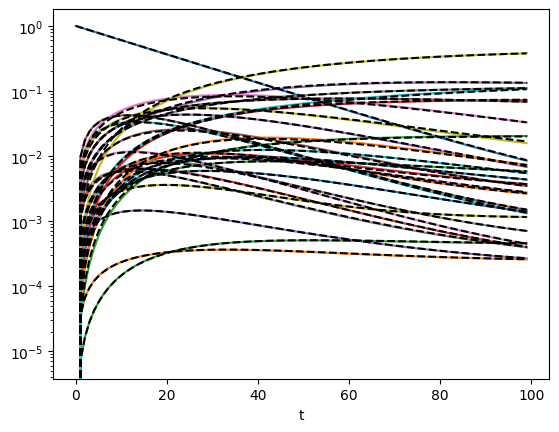

In [10]:
import matplotlib.pyplot as plt
fs_pred = vmapped_solve(D_opt,Nreac)

plt.semilogy(training_data[0,:,:])
plt.semilogy(fs_pred[0,:,:],ls='--',c='k')
plt.xlabel('t')

Text(0.5, 0, 'Epoch')

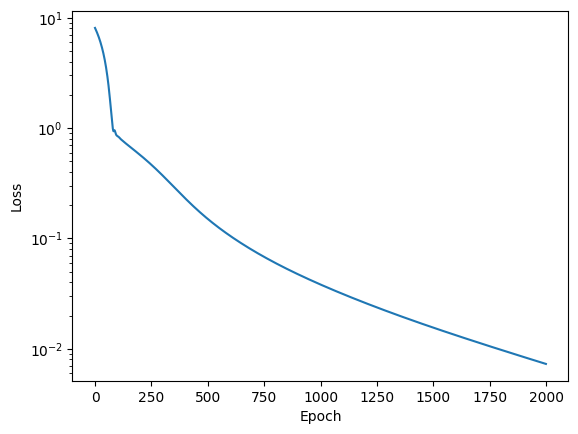

In [12]:
plt.semilogy(history)
plt.ylabel('Loss')
plt.xlabel('Epoch')